In [1]:
from mod_my_utils.read_write_data import *
from mod_macd_utils.macd import *

In [ ]:
from mod_my_utils.read_write_data import 

In [ ]:
from mod_macd_utils.macd import 

In [2]:
help(get_macd_signal_line)

Help on function get_macd_signal_line in module mod_macd_utils.macd:

get_macd_signal_line(data, short_window=20, long_window=50, signal_window=12)
    Get SMA, LMA, MACD, signal_line
    
    parameters
    -----------------------------
    short_window: short moving average size
    long_window: long moving average size
    signal_window: moving average size for signal line
    Output:
    Data frame with price, SMA, LMA, MACD, signal_line
    SMA: short moving average
    LMA: long moving average
    MACD: Moving average convergance divergence values
    MACD: SMA - LMA
    signal_line: moving average of MACD



In [4]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

In [5]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [6]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


In [7]:
short_window = 50
long_window = 200
signal_window = 30

In [8]:
macd_data = get_macd_signal_line(data, short_window, long_window, signal_window)
macd_data.head()

,price,SMA,LMA,MACD,signal_line
Date,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,NaN
2007-12-04,23.108091,NaN,NaN,NaN,NaN
2007-12-05,23.839335,NaN,NaN,NaN,NaN
2007-12-06,24.411582,NaN,NaN,NaN,NaN
2007-12-07,24.970258,NaN,NaN,NaN,NaN


In [9]:
macd_signals_from_mcad = get_signal_macd_crossover(macd_data, long_window)
macd_signals_from_mcad.head()

,price,buy_sell
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,0.0
2007-12-05,23.839335,0.0
2007-12-06,24.411582,0.0
2007-12-07,24.970258,0.0


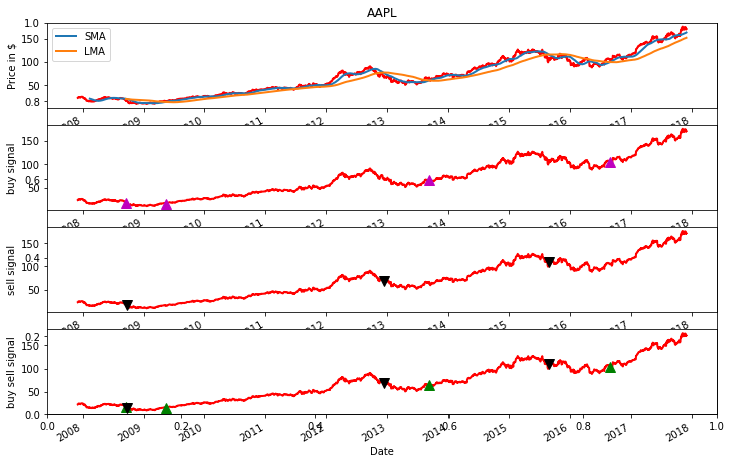

In [10]:
plot_macd_buy_sell(macd_data, macd_signals_from_mcad, symbol = stock_name)

In [11]:
def macd_automated():
    data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)
    data = data[["Adj. Close"]].copy()
    data.columns = ["price"]
    macd_data = get_macd_signal_line(data, short_window, long_window, signal_window)
    macd_signals_from_mcad = get_signal_macd_crossover(macd_data, long_window)
    plot_macd_buy_sell(macd_data, macd_signals_from_mcad, symbol = stock_name)

stock name:  AAPL


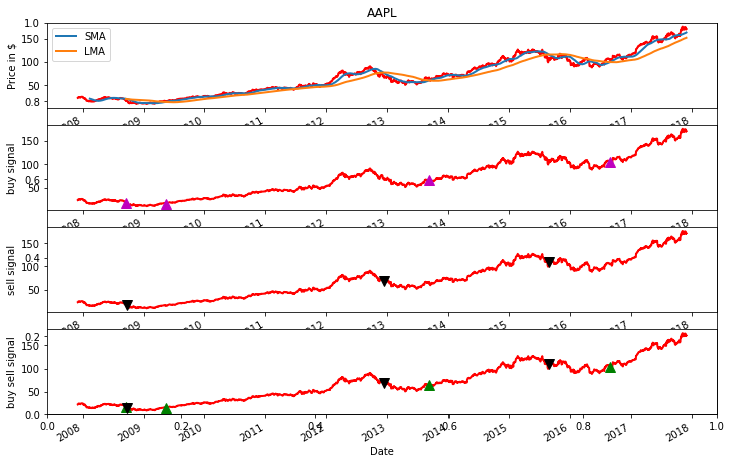

In [12]:
macd_automated()